In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
from tensorflow.python.framework import test_util

print("Is TensorFlow built with CUDA: ", test_util.is_gpu_available())
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("GPU Details: ", tf.config.list_physical_devices('GPU'))

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is TensorFlow built with CUDA:  False
Num GPUs Available:  0
GPU Details:  []


In [10]:
import os


In [12]:
print(os.environ.get('CUDA_HOME'))
print(os.environ.get('PATH'))

None
C:\Users\User\anaconda3;C:\Users\User\anaconda3\Library\mingw-w64\bin;C:\Users\User\anaconda3\Library\usr\bin;C:\Users\User\anaconda3\Library\bin;C:\Users\User\anaconda3\Scripts;C:\Users\User\anaconda3\bin;C:\Users\User\anaconda3\condabin;C:\Users\User\anaconda3;C:\Users\User\anaconda3\Library\mingw-w64\bin;C:\Users\User\anaconda3\Library\usr\bin;C:\Users\User\anaconda3\Library\bin;C:\Users\User\anaconda3\Scripts;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\libnvvp;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0;C:\Windows\System32\OpenSSH;C:\Program Files\Git\cmd;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\NVIDIA Corporation\Nsight Compute 2022.3.0;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8`bin;C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\lib\x64;C:\Users

In [16]:
!pip install torch
import torch

In [18]:
if torch.cuda.is_available():
    print("CUDA is available!")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
else:
    print("CUDA is not available.")

CUDA is not available.


In [1]:
!pip install neptune
!pip install -U neptune-optuna

In [1]:
!pip install tensorflow

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import neptune
import optuna

In [11]:
import PIL
from PIL import Image
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir /content/drive/MyDrive/dataset_cat_dogs

In [ ]:
!mkdir /content/drive/MyDrive/dataset_cat_dogs/cat
!mkdir /content/drive/MyDrive/dataset_cat_dogs/dog

In [ ]:
folder_path = '/content'

In [ ]:
images = [f for f in os.listdir(folder_path) if f.endswith(('png', 'jpg', 'jpeg'))]

In [5]:
from tensorflow.keras.utils import image_dataset_from_directory

In [7]:
!ls

'ls' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
images

In [ ]:
import shutil

In [ ]:
for image in images:

    if image.startswith('cat'):
        shutil.move(os.path.join(folder_path, image), os.path.join(folder_path, 'drive/MyDrive/dataset_cat_dogs/cat', image))

In [ ]:
for image in images:

    if image.startswith('dog'):
        try:
            shutil.move(os.path.join(folder_path, image), os.path.join(folder_path, 'drive/MyDrive/dataset_cat_dogs/dog', image))
        except:
            pass

In [8]:
dataset_path = 'C:\\Users\\User\\Desktop\\Data_Science\\Projects\\HW_27_Image_Generators\\data_set_cat_dogs'

In [ ]:
!ls

In [ ]:
# image_tensor = image_dataset_from_directory(dataset_pass)

In [ ]:
# image_tensor.class_names

In [ ]:
# train_ds = tf.keras.utils.image_dataset_from_directory(

#   'drive/MyDrive/dataset_cat_dogs',

#   validation_split=0.2,

#   subset="training",

#   seed=123,

#   image_size=(256, 256),

#   batch_size=64)

In [ ]:
# test_ds = tf.keras.utils.image_dataset_from_directory(

#   'drive/MyDrive/dataset_cat_dogs',

#   validation_split=0.2,

#   subset="validation",

#   seed=123,

#   image_size=(256, 256),

#   batch_size=64)

In [ ]:
# train_ds

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [10]:
aug_generator = ImageDataGenerator(rescale = 1./255,
                               rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                zoom_range = 0.2,
                                shear_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest',
                                validation_split = 0.2
                                    )

In [12]:
train_aug_generator = aug_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'training'
)

Found 814 images belonging to 2 classes.


In [14]:
test_aug_generator = aug_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'validation'
)

Found 202 images belonging to 2 classes.


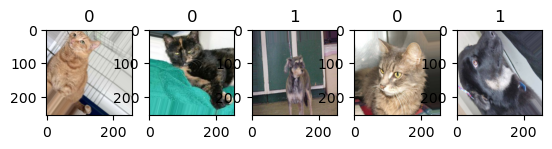

In [16]:
x_batch, y_batch = train_aug_generator.__getitem__(0)
for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))



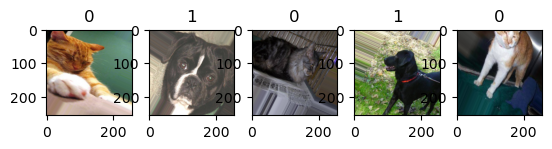

In [18]:
x_batch, y_batch = test_aug_generator.__getitem__(0)

for i in range(0, 5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))

In [20]:
orig_generator = ImageDataGenerator(rescale = 1./255,
                                    validation_split = 0.2)

In [22]:
orig_train_generator = orig_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'training',
    batch_size = 64
)
orig_test_generator = orig_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'validation',
    batch_size = 64
)

Found 814 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


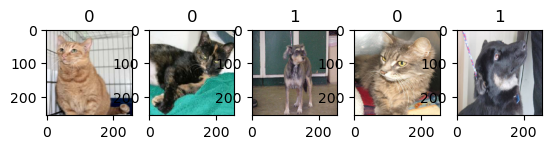

In [33]:
x_batch, y_batch = orig_train_generator.__getitem__(0)

for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))

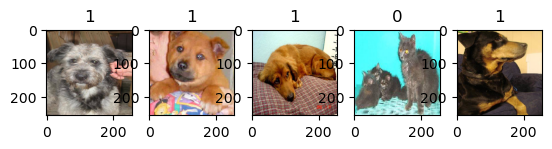

In [66]:
x_batch, y_batch = orig_test_generator.__getitem__(0)

for i in range(0,5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_batch[i])
    plt.title(np.argmax(y_batch[i]))

# Nova secção

In [202]:
tf_model_base = keras.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.BatchNormalization(),
        keras.layers.Dense(128, activation = 'relu'),
        # keras.layers.Dense(50, activation = 'relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation = 'softmax')
    ]
)

tf_model_base.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.0005),
                 loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['Accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



1 Base Train + Aug test

In [150]:
tf_model_base.fit(orig_train_generator, epochs = 10) #2 Conv without normalization

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - Accuracy: 0.4564 - loss: 0.8401
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - Accuracy: 0.5261 - loss: 0.6915
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 69s 5s/step - Accuracy: 0.5540 - loss: 0.6829
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - Accuracy: 0.5984 - loss: 0.6509
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - Accuracy: 0.7443 - loss: 0.5484
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 71s 5s/step - Accuracy: 0.8457 - loss: 0.3960
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 73s 6s/step - Accuracy: 0.9243 - loss: 0.2398
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - Accuracy: 0.9418 - loss: 0.2076
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step - Accuracy: 0.9637 - loss: 0.1301
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - Accuracy: 0.9891 - loss: 0.0754


In [194]:
tf_model_base.fit(orig_train_generator, epochs = 10) # 1 Conv + Normalization

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 115s 4s/step - Accuracy: 0.4988 - loss: 0.8144
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 49s 3s/step - Accuracy: 0.4933 - loss: 0.7809
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - Accuracy: 0.5429 - loss: 0.7231
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 4s/step - Accuracy: 0.5421 - loss: 0.7212
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - Accuracy: 0.5372 - loss: 0.7396
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 46s 3s/step - Accuracy: 0.5440 - loss: 0.7121
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 52s 4s/step - Accuracy: 0.5410 - loss: 0.7066
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - Accuracy: 0.5693 - loss: 0.7002
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - Accuracy: 0.6388 - loss: 0.6303
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - Accuracy: 0.6594 - loss: 0.6115


In [204]:
tf_model_base.fit(orig_train_generator, epochs = 10) # 3 conv layers + Normalization

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 110s 7s/step - Accuracy: 0.5143 - loss: 0.8097
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - Accuracy: 0.5153 - loss: 0.7998
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - Accuracy: 0.5554 - loss: 0.6998
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - Accuracy: 0.5793 - loss: 0.6983
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - Accuracy: 0.5830 - loss: 0.6857
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 91s 7s/step - Accuracy: 0.6358 - loss: 0.6572
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 95s 7s/step - Accuracy: 0.6050 - loss: 0.6440
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 86s 6s/step - Accuracy: 0.6021 - loss: 0.6542
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - Accuracy: 0.6476 - loss: 0.6209
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - Accuracy: 0.6464 - loss: 0.6421


In [196]:
tf_model_base.evaluate(test_aug_generator) #1

7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 850ms/step - Accuracy: 0.4994 - loss: 0.7089


[0.7008277773857117, 0.5148515105247498]

In [206]:
tf_model_base.evaluate(test_aug_generator) #3

7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 823ms/step - Accuracy: 0.5301 - loss: 0.7179


[0.7088848352432251, 0.5396039485931396]

In [154]:
pred = tf_model_base.predict(test_aug_generator)
pred = np.argmax(pred, axis = 1)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 738ms/step


In [156]:
f1 = f1_score(test_aug_generator.classes, pred)
f1

0.5230769230769231

In [198]:
pred = tf_model_base.predict(test_aug_generator) #2
pred = np.argmax(pred, axis = 1)
f1 = f1_score(test_aug_generator.classes, pred)
f1

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 714ms/step


0.09259259259259259

In [208]:
pred = tf_model_base.predict(test_aug_generator) #3
pred = np.argmax(pred, axis = 1)
f1 = f1_score(test_aug_generator.classes, pred)
f1

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 821ms/step


0.037037037037037035

[[58 42]
 [51 51]]


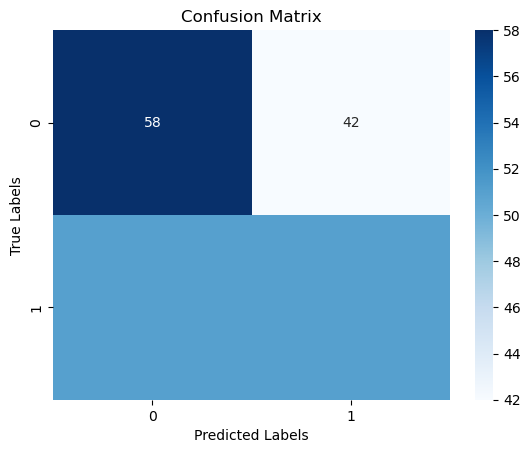

In [164]:
cf = confusion_matrix(test_aug_generator.classes, pred)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[[99  1]
 [97  5]]


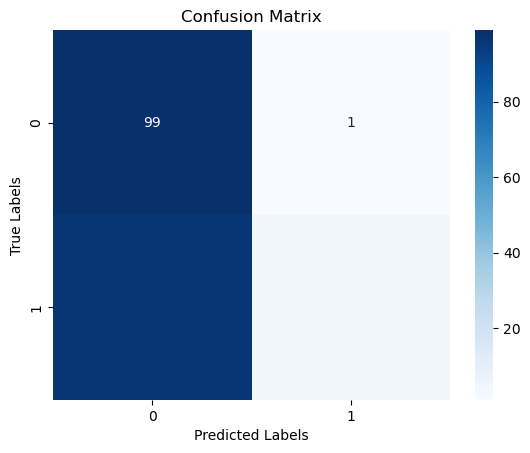

In [200]:
cf = confusion_matrix(test_aug_generator.classes, pred)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[[ 96   4]
 [100   2]]


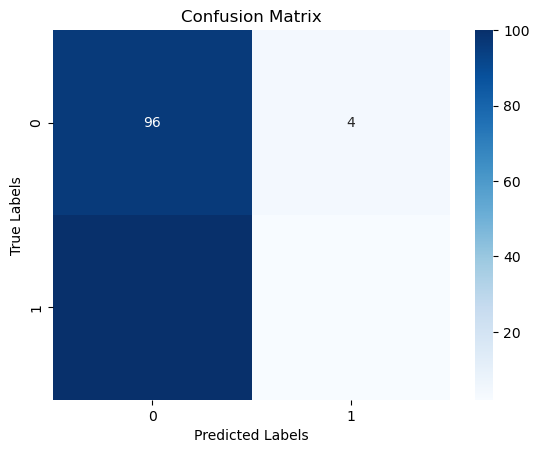

In [210]:
cf = confusion_matrix(test_aug_generator.classes, pred)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [51]:
run = neptune.init_run(
    project="alexandr.losenok/MainProject",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI2YzhkZjJiMS0wYTNmLTQ0NWQtYWRmOC00YWQzOTk5MjJkZDUifQ==",
)

[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/alexandr.losenok/MainProject/e/MAIN-12


In [53]:
import neptune.integrations.optuna as npt_utils
neptune_callback = npt_utils.NeptuneCallback(run)

In [127]:
def model_activation(train_data, test_data, conv_layers, full_con_layers, n_neurons,  dropout, lr, n_channels, loss, epochs):

    model = keras.Sequential()
    model.add(keras.layers.Conv2D(n_channels, (3,3), activation = 'relu', input_shape = (256, 256, 3)))
    model.add(keras.layers.MaxPooling2D((2,2)))

    for i in range(conv_layers+1):
        model.add(keras.layers.Conv2D(n_channels, (3,3), activation = 'relu'))
        model.add(keras.layers.MaxPooling2D((2,2)))

    model.add(keras.layers.Flatten())

    for i in range(full_con_layers+1):
        model.add(keras.layers.Dense(n_neurons, activation = 'relu'))

    model.add(keras.layers.Dropout(dropout))
    model.add(keras.layers.Dense(2, activation = 'softmax'))

    model.compile( optimizer = keras.optimizers.Adam(learning_rate = lr),
                 loss = loss, metrics = ['Accuracy'])

    model.fit(train_data, epochs = epochs)
    pred = model.predict(test_data)
    pred = np.argmax(pred, axis = 1)
    f1 = f1_score(test_data.classes, pred)

    return f1

In [129]:
def objective(trial):

    conv_layers = trial.suggest_int('conv_layers', 1, 2)
    full_con_layers = trial.suggest_int('full_con_layers', 1, 4)
    dropout = trial.suggest_float('dropout', 0.1, 0.5)
    lr = trial.suggest_float('lr', 1e-4, 1e-1, log = True)
    n_channels = trial.suggest_int('n_channels', 32, 128)
    loss = trial.suggest_categorical('loss', ['binary_crossentropy', 'categorical_crossentropy', 'mse'])
    n_neurons = trial.suggest_int('n_neurons', 32, 128)

    model = model_activation(train_data=orig_train_generator, test_data = orig_test_generator, conv_layers = conv_layers, full_con_layers = full_con_layers,
                             n_neurons = n_neurons,  dropout = dropout, lr = lr,
                             n_channels = n_channels, loss = loss, epochs = 10)

    return model

In [131]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10, callbacks=[neptune_callback])

[I 2024-09-15 18:27:00,382] A new study created in memory with name: no-name-2573e8d1-e089-4a6c-871a-8adad207780f


Epoch 1/10


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


13/13 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - Accuracy: 0.5063 - loss: 23.9311
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 55s 4s/step - Accuracy: 0.4968 - loss: 0.6949
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - Accuracy: 0.5125 - loss: 0.6924
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - Accuracy: 0.4893 - loss: 0.6942
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 60s 5s/step - Accuracy: 0.5201 - loss: 0.6935
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 63s 5s/step - Accuracy: 0.5075 - loss: 0.6938
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - Accuracy: 0.4981 - loss: 0.6938
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - Accuracy: 0.4794 - loss: 0.6944
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 53s 4s/step - Accuracy: 0.5332 - loss: 0.6933
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 54s 4s/step - Accuracy: 0.4697 - loss: 0.6936
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 704ms/step


[I 2024-09-15 18:36:23,911] Trial 0 finished with value: 0.0 and parameters: {'conv_layers': 2, 'full_con_layers': 4, 'dropout': 0.4304730390706927, 'lr': 0.02663585231765706, 'n_channels': 51, 'loss': 'binary_crossentropy', 'n_neurons': 95}. Best is trial 0 with value: 0.0.
[W 2024-09-15 18:36:26,016] Param dropout unique value length is less than 2.
[W 2024-09-15 18:36:26,017] Param full_con_layers unique value length is less than 2.
[W 2024-09-15 18:36:26,019] Param loss unique value length is less than 2.
[W 2024-09-15 18:36:26,020] Param lr unique value length is less than 2.
[W 2024-09-15 18:36:26,021] Param n_channels unique value length is less than 2.
[W 2024-09-15 18:36:26,022] Param n_neurons unique value length is less than 2.
[W 2024-09-15 18:36:26,024] Param conv_layers unique value length is less than 2.
[W 2024-09-15 18:36:26,025] Param full_con_layers unique value length is less than 2.
[W 2024-09-15 18:36:26,027] Param loss unique value length is less than 2.
[W 2024-

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 48s 3s/step - Accuracy: 0.4815 - loss: 1.0485
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - Accuracy: 0.5039 - loss: 0.6934
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - Accuracy: 0.4615 - loss: 0.6954
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - Accuracy: 0.5137 - loss: 0.6928
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - Accuracy: 0.4492 - loss: 0.6957
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 42s 3s/step - Accuracy: 0.5145 - loss: 0.6924
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 43s 3s/step - Accuracy: 0.4612 - loss: 0.6946
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - Accuracy: 0.4817 - loss: 0.6946
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - Accuracy: 0.4750 - loss: 0.6940
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - Accuracy: 0.5036 - loss: 0.6930
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 600ms/stepWARNING:tensorflow:5 out of the last 2954 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on

[I 2024-09-15 18:43:22,966] Trial 1 finished with value: 0.6710526315789473 and parameters: {'conv_layers': 1, 'full_con_layers': 3, 'dropout': 0.4483248373009636, 'lr': 0.002555133907643771, 'n_channels': 44, 'loss': 'categorical_crossentropy', 'n_neurons': 119}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 7s/step - Accuracy: 0.5161 - loss: 0.2585
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - Accuracy: 0.5010 - loss: 0.2470
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - Accuracy: 0.5954 - loss: 0.2390
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - Accuracy: 0.6620 - loss: 0.2234
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - Accuracy: 0.6403 - loss: 0.2182
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 91s 7s/step - Accuracy: 0.7652 - loss: 0.1833
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 88s 7s/step - Accuracy: 0.7949 - loss: 0.1680
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - Accuracy: 0.7746 - loss: 0.1534
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - Accuracy: 0.8418 - loss: 0.1252
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 90s 7s/step - Accuracy: 0.9247 - loss: 0.0750
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 866ms/step


[I 2024-09-15 18:58:27,225] Trial 2 finished with value: 0.5753424657534247 and parameters: {'conv_layers': 1, 'full_con_layers': 4, 'dropout': 0.475392853036259, 'lr': 0.0002923297777446626, 'n_channels': 67, 'loss': 'mse', 'n_neurons': 70}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - Accuracy: 0.4991 - loss: 0.6941
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step - Accuracy: 0.5096 - loss: 0.6926
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - Accuracy: 0.5390 - loss: 0.6880
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 77s 6s/step - Accuracy: 0.5502 - loss: 0.6869
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - Accuracy: 0.5459 - loss: 0.6806
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - Accuracy: 0.5725 - loss: 0.6794
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 89s 7s/step - Accuracy: 0.5944 - loss: 0.6665
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 5s/step - Accuracy: 0.6266 - loss: 0.6504
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 74s 6s/step - Accuracy: 0.6643 - loss: 0.6299
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 72s 5s/step - Accuracy: 0.6324 - loss: 0.6301
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 797ms/step


[I 2024-09-15 19:11:38,040] Trial 3 finished with value: 0.2933333333333333 and parameters: {'conv_layers': 2, 'full_con_layers': 2, 'dropout': 0.4743953012551049, 'lr': 0.00015477177329702047, 'n_channels': 61, 'loss': 'categorical_crossentropy', 'n_neurons': 48}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 172s 12s/step - Accuracy: 0.5007 - loss: 0.7185
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 164s 12s/step - Accuracy: 0.5028 - loss: 0.6894
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 162s 12s/step - Accuracy: 0.5128 - loss: 0.6841
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 161s 12s/step - Accuracy: 0.5389 - loss: 0.6771
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 165s 13s/step - Accuracy: 0.5179 - loss: 0.6881
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 163s 13s/step - Accuracy: 0.5628 - loss: 0.6630
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 167s 13s/step - Accuracy: 0.6173 - loss: 0.6432
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 164s 12s/step - Accuracy: 0.6407 - loss: 0.6307
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 171s 13s/step - Accuracy: 0.6726 - loss: 0.6159
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 166s 13s/step - Accuracy: 0.6497 - loss: 0.5914
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


[I 2024-09-15 19:39:23,697] Trial 4 finished with value: 0.43636363636363634 and parameters: {'conv_layers': 1, 'full_con_layers': 1, 'dropout': 0.4314379917338703, 'lr': 0.00015001879956297627, 'n_channels': 95, 'loss': 'categorical_crossentropy', 'n_neurons': 62}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 178s 13s/step - Accuracy: 0.4751 - loss: 0.7171
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 170s 13s/step - Accuracy: 0.4942 - loss: 0.6947
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 170s 13s/step - Accuracy: 0.4737 - loss: 0.6947
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 170s 13s/step - Accuracy: 0.4709 - loss: 0.7021
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 168s 13s/step - Accuracy: 0.5057 - loss: 0.6931
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 171s 13s/step - Accuracy: 0.5025 - loss: 0.6933
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 167s 13s/step - Accuracy: 0.4945 - loss: 0.6935
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 166s 13s/step - Accuracy: 0.4968 - loss: 0.6937
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 163s 12s/step - Accuracy: 0.5062 - loss: 0.6931
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 164s 12s/step - Accuracy: 0.5303 - loss: 0.6926
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


[I 2024-09-15 20:07:42,107] Trial 5 finished with value: 0.6710526315789473 and parameters: {'conv_layers': 2, 'full_con_layers': 1, 'dropout': 0.2880530004316644, 'lr': 0.002323110226813067, 'n_channels': 100, 'loss': 'categorical_crossentropy', 'n_neurons': 118}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 281s 21s/step - Accuracy: 0.5240 - loss: 0.2519
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 20s/step - Accuracy: 0.4819 - loss: 0.2504
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 265s 20s/step - Accuracy: 0.5254 - loss: 0.2480
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 21s/step - Accuracy: 0.5183 - loss: 0.2493
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 267s 20s/step - Accuracy: 0.5279 - loss: 0.2456
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 262s 20s/step - Accuracy: 0.5521 - loss: 0.2459
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 20s/step - Accuracy: 0.5798 - loss: 0.2364
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 20s/step - Accuracy: 0.6353 - loss: 0.2282
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 266s 20s/step - Accuracy: 0.6448 - loss: 0.2176
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 264s 20s/step - Accuracy: 0.6471 - loss: 0.2184
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step


[I 2024-09-15 20:52:34,102] Trial 6 finished with value: 0.339622641509434 and parameters: {'conv_layers': 2, 'full_con_layers': 3, 'dropout': 0.1571945978893845, 'lr': 0.00018369426482387426, 'n_channels': 126, 'loss': 'mse', 'n_neurons': 57}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 11s/step - Accuracy: 0.5141 - loss: 0.2553
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 147s 11s/step - Accuracy: 0.5361 - loss: 0.2501
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 157s 12s/step - Accuracy: 0.5539 - loss: 0.2486
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 170s 13s/step - Accuracy: 0.4953 - loss: 0.2500
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 166s 13s/step - Accuracy: 0.5834 - loss: 0.2455
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 183s 14s/step - Accuracy: 0.5252 - loss: 0.2492
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 192s 15s/step - Accuracy: 0.4765 - loss: 0.2509
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 184s 14s/step - Accuracy: 0.5394 - loss: 0.2449
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 185s 14s/step - Accuracy: 0.5588 - loss: 0.2363
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 183s 14s/step - Accuracy: 0.5934 - loss: 0.2345
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step


[I 2024-09-15 21:21:20,749] Trial 7 finished with value: 0.4727272727272727 and parameters: {'conv_layers': 1, 'full_con_layers': 4, 'dropout': 0.38094464021022045, 'lr': 0.0007203229751118069, 'n_channels': 92, 'loss': 'mse', 'n_neurons': 94}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 97s 6s/step - Accuracy: 0.5152 - loss: 0.2506
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 80s 6s/step - Accuracy: 0.5150 - loss: 0.2502
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 82s 6s/step - Accuracy: 0.5464 - loss: 0.2430
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - Accuracy: 0.5985 - loss: 0.2372
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 87s 7s/step - Accuracy: 0.5969 - loss: 0.2298
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 85s 6s/step - Accuracy: 0.6457 - loss: 0.2192
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - Accuracy: 0.6840 - loss: 0.2077
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - Accuracy: 0.6744 - loss: 0.2104
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 81s 6s/step - Accuracy: 0.7609 - loss: 0.1848
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 84s 6s/step - Accuracy: 0.8015 - loss: 0.1659
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 965ms/step


[I 2024-09-15 21:35:37,895] Trial 8 finished with value: 0.543778801843318 and parameters: {'conv_layers': 1, 'full_con_layers': 3, 'dropout': 0.10300411076523655, 'lr': 0.0001138128869670789, 'n_channels': 60, 'loss': 'mse', 'n_neurons': 61}. Best is trial 1 with value: 0.6710526315789473.
C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 44s 3s/step - Accuracy: 0.4949 - loss: 0.4392
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - Accuracy: 0.5316 - loss: 0.4684
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - Accuracy: 0.5117 - loss: 0.4883
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - Accuracy: 0.4839 - loss: 0.5161
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step - Accuracy: 0.5145 - loss: 0.4855
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 40s 3s/step - Accuracy: 0.5295 - loss: 0.4705
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 38s 3s/step - Accuracy: 0.5292 - loss: 0.4708
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step - Accuracy: 0.5074 - loss: 0.4926
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - Accuracy: 0.5086 - loss: 0.4914
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - Accuracy: 0.5334 - loss: 0.4666
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 512ms/step


[I 2024-09-15 21:42:21,061] Trial 9 finished with value: 0.6710526315789473 and parameters: {'conv_layers': 2, 'full_con_layers': 1, 'dropout': 0.39556628997052157, 'lr': 0.026447114117115828, 'n_channels': 39, 'loss': 'mse', 'n_neurons': 51}. Best is trial 1 with value: 0.6710526315789473.


2 Base Train + Base test

In [166]:
tf_model_base.evaluate(orig_test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 615ms/step - Accuracy: 0.6875 - loss: 0.8674


[0.859696090221405, 0.698019802570343]

In [212]:
tf_model_base.evaluate(orig_test_generator) #3

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 710ms/step - Accuracy: 0.5495 - loss: 0.6906


[0.6864522099494934, 0.5495049357414246]

In [168]:
pred_base = np.argmax(tf_model_base.predict(orig_test_generator), axis = 1) #1
f1_base_base = f1_score(orig_test_generator.classes, pred_base)
f1_base_base

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 658ms/step


0.43654822335025384

In [214]:
pred_base = np.argmax(tf_model_base.predict(orig_test_generator), axis = 1) #3
f1_base_base = f1_score(orig_test_generator.classes, pred_base)
f1_base_base

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 792ms/step


0.07079646017699116

[[58 42]
 [51 51]]


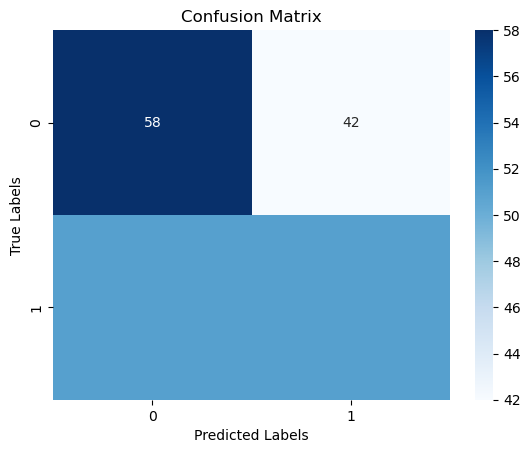

In [170]:
cf = confusion_matrix(orig_test_generator.classes, pred) #1
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[[ 96   4]
 [100   2]]


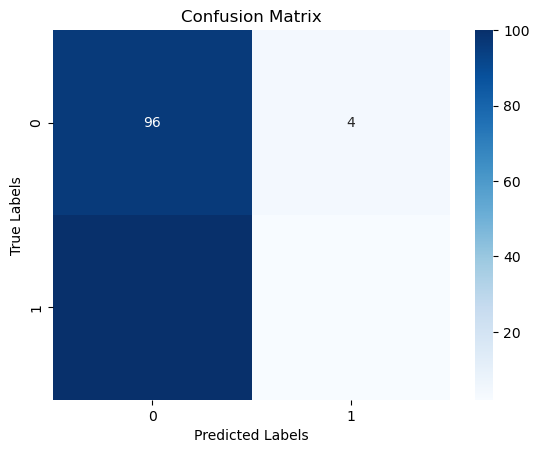

In [216]:
cf = confusion_matrix(orig_test_generator.classes, pred) #1
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

3. Train Aug + Base test

In [176]:
tf_model_aug = keras.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(128, activation = 'relu'),
        # keras.layers.Dense(50, activation = 'relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation = 'softmax')
    ]
)

tf_model_aug.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.0005),
                 loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['Accuracy'])

In [178]:
tf_model_aug.fit(train_aug_generator, epochs = 10)

Epoch 1/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 92s 3s/step - Accuracy: 0.4875 - loss: 1.0370
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 83s 3s/step - Accuracy: 0.5624 - loss: 0.6902
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - Accuracy: 0.5578 - loss: 0.6822
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - Accuracy: 0.5646 - loss: 0.6814
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - Accuracy: 0.5726 - loss: 0.6754
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 72s 3s/step - Accuracy: 0.5826 - loss: 0.6794
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - Accuracy: 0.5274 - loss: 0.6945
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - Accuracy: 0.5754 - loss: 0.6814
Epoch 9/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - Accuracy: 0.5545 - loss: 0.6864
Epoch 10/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step - Accuracy: 0.5167 - loss: 0.6842


In [180]:
tf_model_aug.evaluate(orig_test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 614ms/step - Accuracy: 0.4984 - loss: 0.8013


[0.7922190427780151, 0.5]

In [182]:
len(tf_model_aug.predict(orig_test_generator))

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 673ms/step


202

In [188]:
pred_base = np.argmax(tf_model_aug.predict(orig_test_generator), axis = 1)
f1_aug_base = f1_score(orig_test_generator.classes, pred_base)
f1_aug_base

4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 623ms/step


0.6644518272425248

[[  1  99]
 [  2 100]]


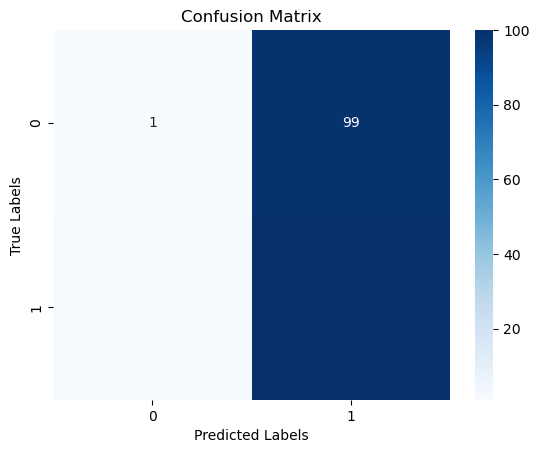

In [190]:
cf = confusion_matrix(orig_test_generator.classes, pred_base)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [218]:
tf_model_comb = keras.Sequential(
    [
        keras.layers.Conv2D(64, (3,3), activation = 'relu', input_shape = (256, 256, 3)),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        keras.layers.MaxPooling2D((2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(128, activation = 'relu'),
        # keras.layers.Dense(50, activation = 'relu'),
        # keras.layers.BatchNormalization(),
        keras.layers.Dense(2, activation = 'softmax')
    ]
)

tf_model_comb.compile( optimizer = keras.optimizers.Adam(learning_rate = 0.0005),
                 loss = tf.keras.losses.CategoricalCrossentropy(), metrics = ['Accuracy'])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [ ]:
type(x_train)

In [111]:
def combine_generator(*gen):
  for g in gen:
    try:
        while True:
            yield next(g)
    except StopIteration:
        break

combine_train = combine_generator(train_aug_generator, orig_train_generator)
combine_test = combine_generator(test_aug_generator, orig_test_generator)

In [222]:
tf_model_comb.fit(combine_train, epochs = 10, steps_per_epoch = len(train_aug_generator) + len(orig_train_generator))

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - Accuracy: 0.5105 - loss: 0.9386
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - Accuracy: 0.5384 - loss: 0.6799
Epoch 3/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 97s 2s/step - Accuracy: 0.6017 - loss: 0.6594
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - Accuracy: 0.5310 - loss: 0.6809
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - Accuracy: 0.5651 - loss: 0.6564
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - Accuracy: 0.5827 - loss: 0.6675
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - Accuracy: 0.5974 - loss: 0.6363
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - Accuracy: 0.5810 - loss: 0.6606
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - Accuracy: 0.5651 - loss: 0.6716
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - Accuracy: 0.6113 - loss: 0.6367


In [224]:
tf_model_comb.evaluate(combine_test, steps = len(test_aug_generator) + len(orig_test_generator))

11/11 ━━━━━━━━━━━━━━━━━━━━ 9s 843ms/step - Accuracy: 0.6151 - loss: 0.6422


[0.6432482004165649, 0.5909090638160706]

In [226]:
pred_comb = np.argmax(tf_model_comb.predict(combine_test, steps = len(test_aug_generator) + len(orig_test_generator)), axis = 1)
        

11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 745ms/step


AttributeError: 'generator' object has no attribute 'classes'

In [276]:
test_comb_labels = []

for g in [orig_test_generator, test_aug_generator]:
        steps = g.samples // g.batch_size
        for i in range(steps):
                img, label = next(g)
                
                test_comb_labels.extend(np.argmax(label, axis = 1))



In [280]:
len(pred_comb)

308

In [284]:
f1_comb = f1_score(test_comb_labels, pred_comb)
f1_comb

0.29437229437229434

[[111  44]
 [119  34]]


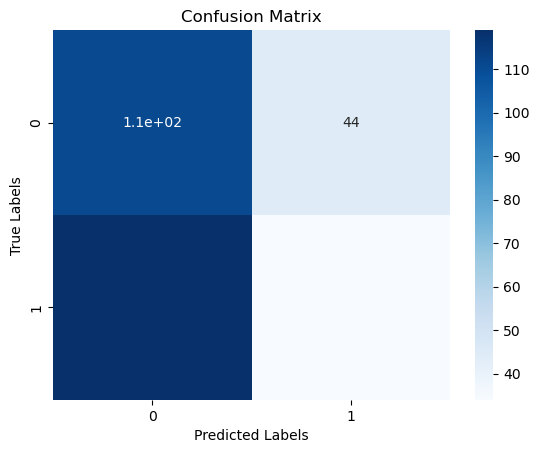

In [288]:
cf = confusion_matrix(test_comb_labels, pred_comb)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
Transfering model

In [24]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

In [26]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [44]:
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

In [46]:
model = Model(inputs=base_model.input, outputs=predictions)

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
histoy = model.fit(orig_train_generator, epochs = 3, validation_data = orig_test_generator)

Epoch 1/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 325s 25s/step - accuracy: 0.5218 - loss: 3.2541 - val_accuracy: 0.5050 - val_loss: 1.1362
Epoch 2/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 331s 26s/step - accuracy: 0.6988 - loss: 0.7490 - val_accuracy: 0.8762 - val_loss: 0.2945
Epoch 3/3
13/13 ━━━━━━━━━━━━━━━━━━━━ 356s 28s/step - accuracy: 0.8843 - loss: 0.2929 - val_accuracy: 0.8861 - val_loss: 0.2668


In [54]:
pred_base = np.argmax(model.predict(orig_test_generator), axis = 1)
# f1_aug_base = f1_score(orig_test_generator.classes, pred_base)
# f1_aug_base

4/4 ━━━━━━━━━━━━━━━━━━━━ 65s 15s/step


In [52]:
model.evaluate(orig_test_generator)

4/4 ━━━━━━━━━━━━━━━━━━━━ 63s 15s/step - accuracy: 0.8873 - loss: 0.2733


[0.26683536171913147, 0.8861386179924011]

In [78]:
true_labels = []
for i in range(len(orig_test_generator)):
        x_batch, y_batch = orig_test_generator[i]
        true_labels.extend(np.argmax(y_batch, axis = 1))

In [80]:
true_labels

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1]

In [82]:
f1_aug_base = f1_score(true_labels, pred_base, average = 'weighted')
f1_aug_base

0.5295299779371007

[[51 49]
 [46 56]]


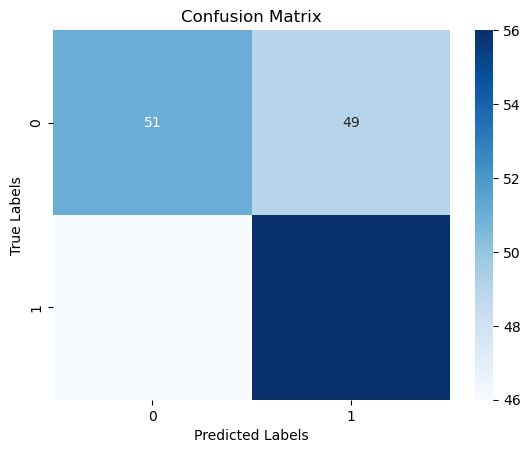

In [258]:
cf = confusion_matrix(true_labels, pred_base)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [86]:
np.array(true_labels)

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

In [64]:
pred_base

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1], dtype=int64)

In [ ]:
ADDITIONAL PREPROCESSING

In [104]:
import torch

In [162]:
from tensorflow.data import Dataset

In [128]:
_aug_generator = ImageDataGenerator(
                               rotation_range = 40,
                                width_shift_range = 0.2,
                                height_shift_range = 0.2,
                                zoom_range = 0.2,
                                shear_range = 0.2,
                                horizontal_flip = True,
                                fill_mode = 'nearest',
                                validation_split = 0.2
                                    )

In [130]:
_train_aug_generator = _aug_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'training'
)

Found 814 images belonging to 2 classes.


In [132]:
_test_aug_generator = _aug_generator.flow_from_directory(
    dataset_path,
    class_mode = 'categorical',
    seed = 123,
    subset = 'validation'
)

Found 202 images belonging to 2 classes.


In [134]:
train_aug_img_list = []
train_aug_lbl_list = []
for i in range(len(_train_aug_generator)):
        x_batch, y_batch = _train_aug_generator[i]
        train_aug_img_list.extend(x_batch)
        train_aug_lbl_list.extend(y_batch)

In [135]:
test_aug_img_list = []
test_aug_lbl_list = []
for i in range(len(_test_aug_generator)):
        x_batch, y_batch = _test_aug_generator[i]
        test_aug_img_list.extend(x_batch)
        test_aug_lbl_list.extend(y_batch)

In [136]:
train_aug_img = np.array(train_aug_img_list)
train_aug_lbl = np.array(train_aug_lbl_list)

In [137]:
test_aug_img = np.array(test_aug_img_list)
test_aug_lbl = np.array(test_aug_lbl_list)

In [154]:
train_aug_img_tensor = tf.convert_to_tensor(train_aug_img, dtype = np.int32)
train_aug_lbl_tensor = tf.convert_to_tensor(train_aug_lbl, dtype = np.int32)

In [156]:
test_aug_img_tensor = tf.convert_to_tensor(test_aug_img, dtype = np.int32)
test_aug_lbl_tensor = tf.convert_to_tensor(test_aug_lbl, dtype = np.int32)

In [166]:
train_aug_ds = Dataset.from_tensor_slices((train_aug_img_tensor, train_aug_lbl_tensor))
test_aug_ds = Dataset.from_tensor_slices((test_aug_img_tensor, test_aug_lbl_tensor))

In [196]:
AUTOTUNE = tf.data.AUTOTUNE

_train_aug_ds = train_aug_ds.cache().batch(64).shuffle(1000).prefetch(buffer_size=AUTOTUNE)
_test_aug_ds = test_aug_ds.cache().batch(64).prefetch(buffer_size=AUTOTUNE)

In [198]:
normalize_layer = keras.layers.Rescaling(1./255)

In [200]:
_train_aug_ds_norm = _train_aug_ds.map(lambda x, y: (normalize_layer(x), y))
x_batch, y_batch = next(iter(_train_aug_ds_norm))
img_0 = x_batch[0]
print(np.min(img_0), np.max(img_0))

0.003921569 1.0


In [202]:
_test_aug_ds_norm = _test_aug_ds.map(lambda x, y: (normalize_layer(x), y))

In [238]:
_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

In [240]:
for layer in _base_model.layers:
    layer.trainable = False

x = _base_model.output
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dropout(0.3)(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
predictions = keras.layers.Dense(2, activation='softmax')(x)

In [242]:
_model = Model(inputs=_base_model.input, outputs=predictions)

In [244]:
_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [246]:
history = _model.fit(_train_aug_ds_norm, epochs = 5, validation_data = _test_aug_ds_norm)

Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 392s 31s/step - accuracy: 0.5304 - loss: 1.9624 - val_accuracy: 0.6881 - val_loss: 0.5518
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 393s 31s/step - accuracy: 0.6658 - loss: 0.6583 - val_accuracy: 0.6832 - val_loss: 0.5858
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 395s 31s/step - accuracy: 0.7962 - loss: 0.4807 - val_accuracy: 0.8168 - val_loss: 0.4226
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 390s 30s/step - accuracy: 0.8135 - loss: 0.4126 - val_accuracy: 0.7970 - val_loss: 0.4579
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 396s 31s/step - accuracy: 0.8906 - loss: 0.2638 - val_accuracy: 0.8366 - val_loss: 0.3728


In [256]:
_model.evaluate(_test_aug_ds_norm)

4/4 ━━━━━━━━━━━━━━━━━━━━ 82s 16s/step - accuracy: 0.8347 - loss: 0.3956


[0.3728398382663727, 0.8366336822509766]

In [248]:
_pred_base = np.argmax(_model.predict(_test_aug_ds_norm), axis = 1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 17s/step


In [222]:
len(_pred_base)

202

In [232]:
_true_labels = []
for x_batch, y_batch in _test_aug_ds_norm:
        _true_labels.extend(np.argmax(y_batch, axis = 1))

In [252]:
len(_true_labels)

202

In [250]:
_f1 = f1_score(_true_labels, _pred_base, average = 'weighted')
_f1

0.835331248785745

In [266]:
acc = accuracy_score(_true_labels, _pred_base)

[[93  7]
 [26 76]]


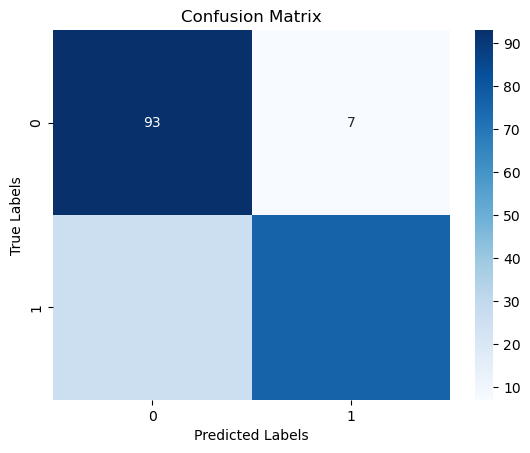

In [260]:
cf = confusion_matrix(_true_labels, _pred_base)
print(cf)
sns.heatmap(cf, annot = True, cmap = 'Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()